In [88]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
df=pd.read_csv('Data\\Customers EDA+Stats.csv')

In [90]:
df

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-08-07,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,20174.70,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,03-28-2019,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


# Data Cleaning

In [91]:
df['date']=df['date'].str.replace(' ','-',regex=False)
df['date']=df['date'].str.replace('/','-',regex=False)
def convert_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y').strftime('%Y-%m-%d')
    except ValueError:
        return pd.to_datetime(date_str).strftime('%Y-%m-%d')

df['date'] = df['date'].apply(convert_date)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [92]:
df['latest_customer_review']=df['latest_customer_review'].fillna("No Review")

In [93]:
df['nearest_warehouse'] = df['nearest_warehouse'].str.lower()
df['season'] = df['season'].str.lower()

# EDA

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    datetime64[ns]
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    int64         
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    float64       
 11  season             

In [95]:
# Summary statistics for numerical columns
summary_stats = df[['order_price', 'order_total', 'distance_to_nearest_warehouse']].describe()
print(summary_stats)

# Calculate standard deviation
std_dev = df[['order_price', 'order_total', 'distance_to_nearest_warehouse']].std()
print(std_dev)

         order_price   order_total  distance_to_nearest_warehouse
count     500.000000  5.000000e+02                     500.000000
mean    25522.216000  3.920967e+04                       2.204224
std     86333.729169  2.741940e+05                       8.812416
min       585.000000  6.392900e+02                       0.107800
25%      7050.000000  6.454735e+03                       0.751425
50%     12807.500000  1.129396e+04                       1.030100
75%     20360.000000  1.811919e+04                       1.408625
max    947691.000000  5.688270e+06                      94.973400
order_price                       86333.729169
order_total                      274194.016283
distance_to_nearest_warehouse         8.812416
dtype: float64


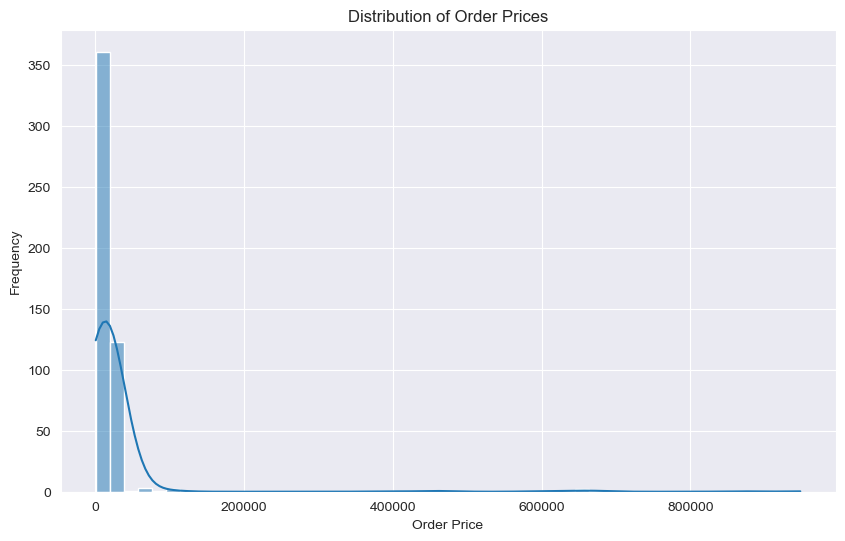

In [96]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['order_price'], bins=50, kde=True)
plt.title('Distribution of Order Prices')
plt.xlabel('Order Price')
plt.ylabel('Frequency')
plt.show()

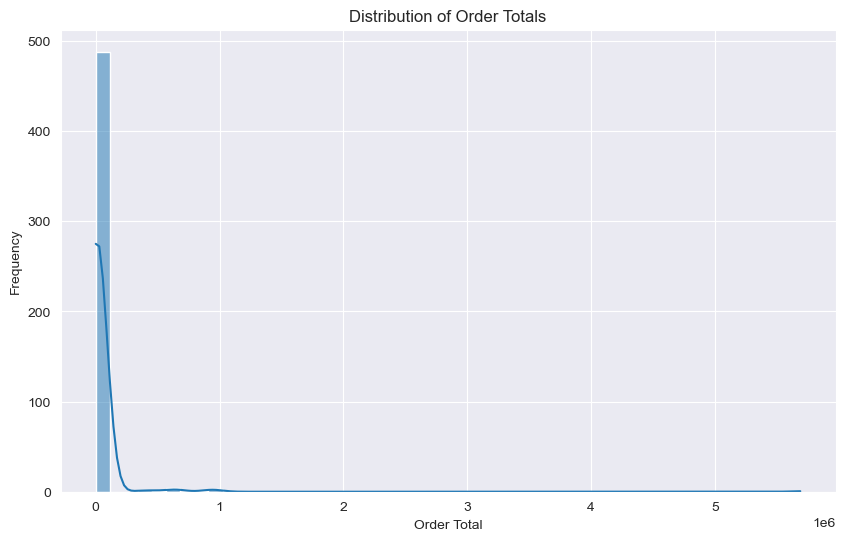

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(df['order_total'], bins=50, kde=True)
plt.title('Distribution of Order Totals')
plt.xlabel('Order Total')
plt.ylabel('Frequency')
plt.show()

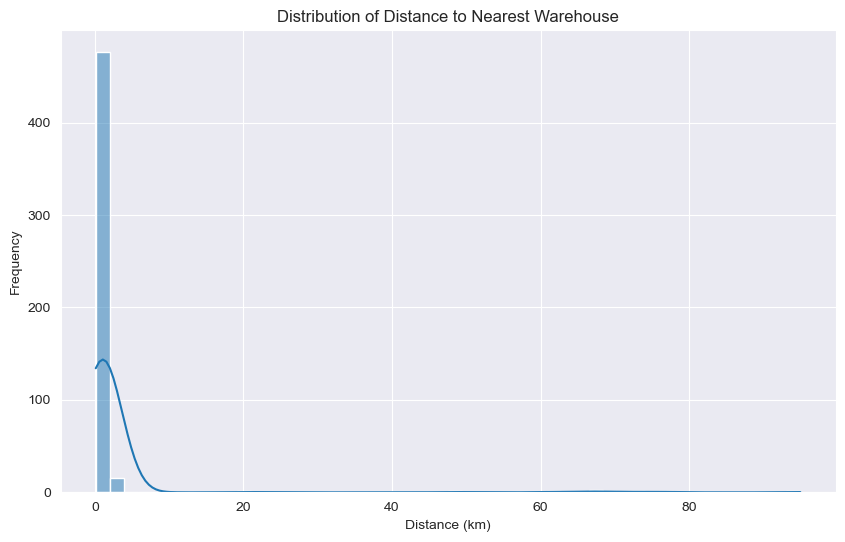

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(df['distance_to_nearest_warehouse'], bins=50, kde=True)
plt.title('Distribution of Distance to Nearest Warehouse')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

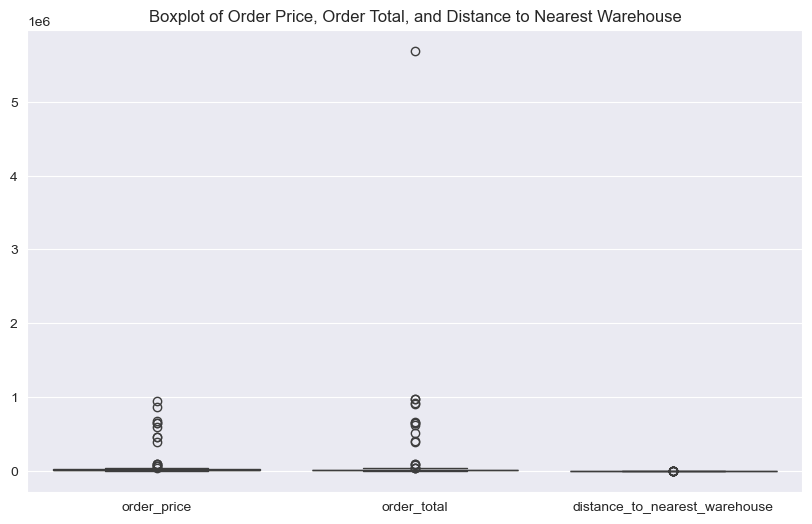

In [99]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['order_price', 'order_total', 'distance_to_nearest_warehouse']])
plt.title('Boxplot of Order Price, Order Total, and Distance to Nearest Warehouse')
plt.show()

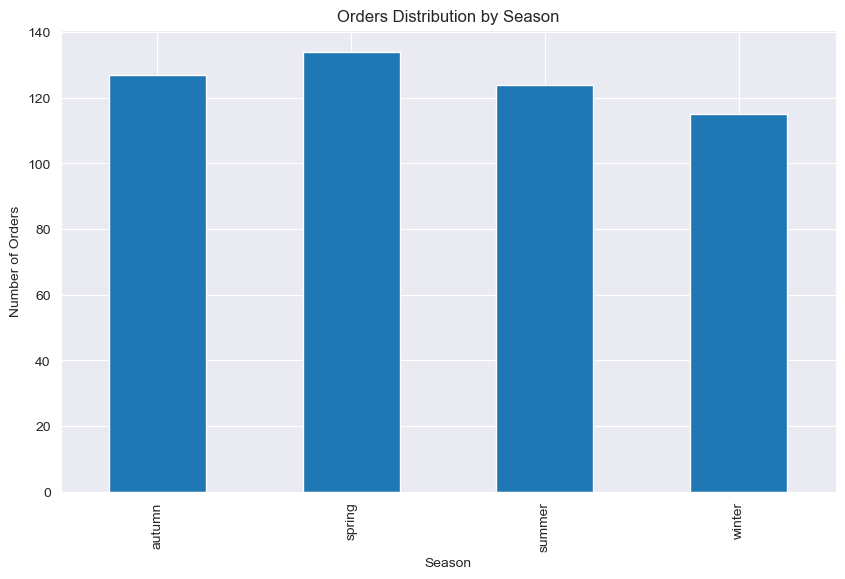

In [100]:
# Count orders by season
orders_by_season = df['season'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
orders_by_season.plot(kind='bar')
plt.title('Orders Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Number of Orders')
plt.show()

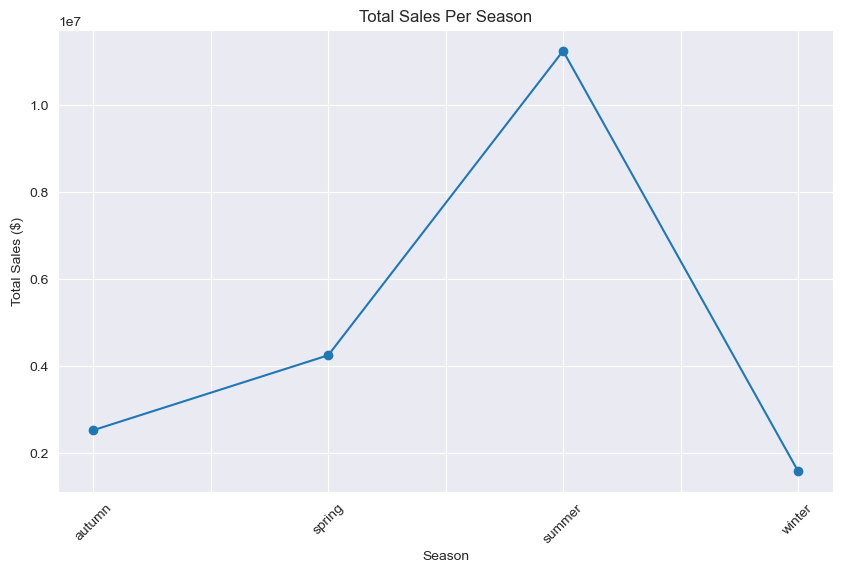

In [101]:
# Calculate total sales per season
total_sales_per_season = df.groupby('season')['order_total'].sum()

# Plot line graph
plt.figure(figsize=(10, 6))
total_sales_per_season.plot(kind='line', marker='o')
plt.title('Total Sales Per Season')
plt.xlabel('Season')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

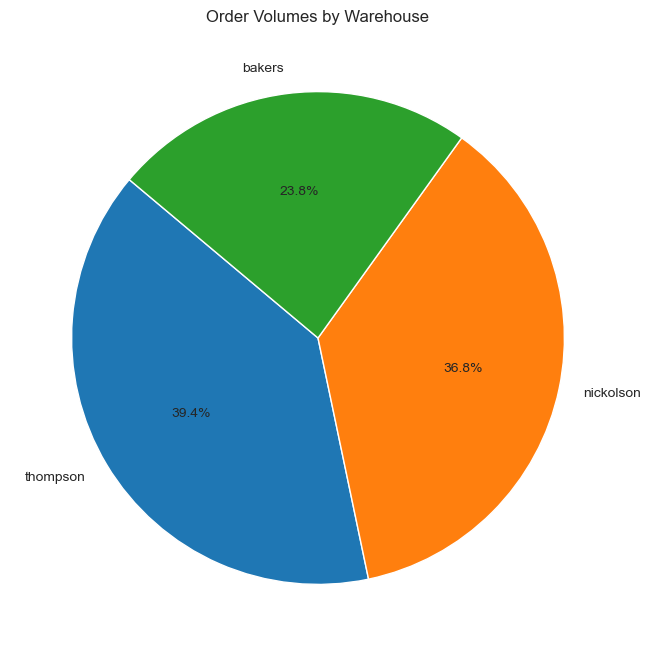

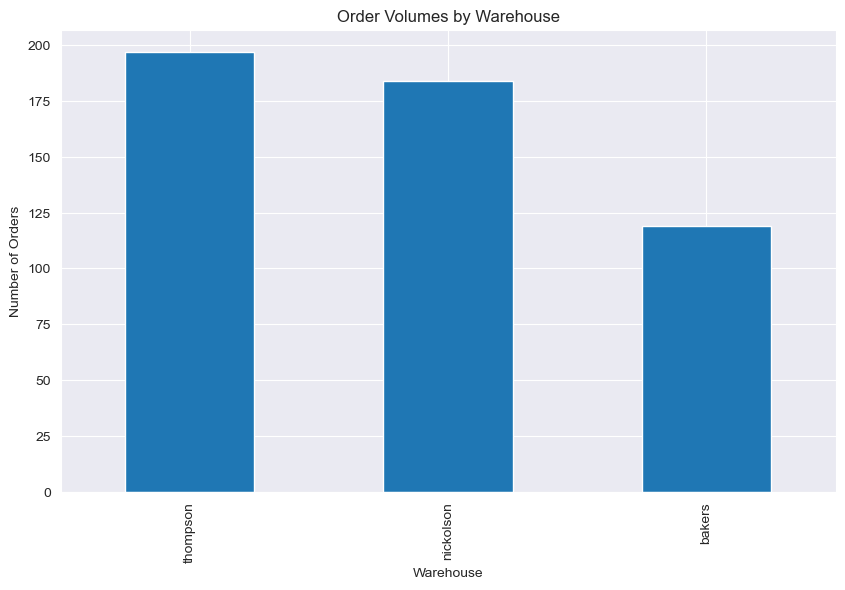

In [102]:
# Count orders by nearest warehouse
orders_by_warehouse = df['nearest_warehouse'].value_counts()

# Pie chart for order volumes
plt.figure(figsize=(8, 8))
plt.pie(orders_by_warehouse, labels=orders_by_warehouse.index, autopct='%1.1f%%', startangle=140)
plt.title('Order Volumes by Warehouse')
plt.show()

# Bar chart for order volumes by warehouse
plt.figure(figsize=(10, 6))
orders_by_warehouse.plot(kind='bar')
plt.title('Order Volumes by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Number of Orders')
plt.show()

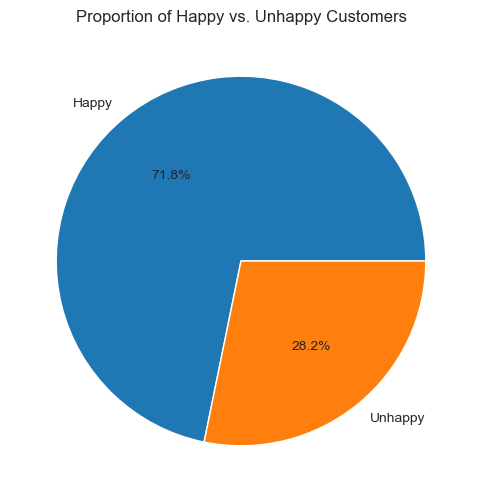

In [103]:
# Proportion of happy vs. unhappy customers
happy_vs_unhappy = df['is_happy_customer'].value_counts(normalize=True)

# Plot pie chart
plt.figure(figsize=(6, 6))
happy_vs_unhappy.plot(kind='pie', autopct='%1.1f%%', labels=['Happy', 'Unhappy'], title='Proportion of Happy vs. Unhappy Customers')
plt.ylabel('')
plt.show()

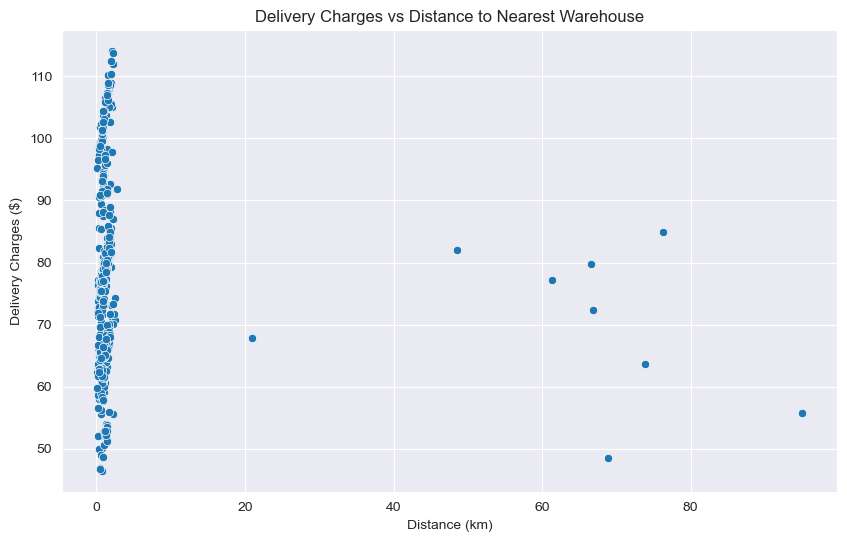

In [104]:
# Scatter plot for delivery charges vs distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_nearest_warehouse', y='delivery_charges', data=df)
plt.title('Delivery Charges vs Distance to Nearest Warehouse')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Charges ($)')
plt.show()

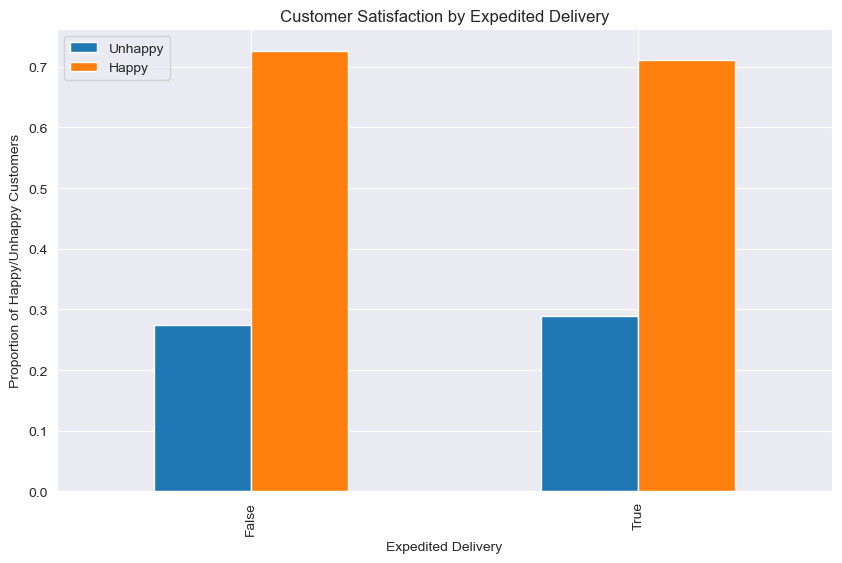

In [105]:
# Grouped bar chart for customer satisfaction by expedited delivery
expedited_satisfaction = df.groupby('is_expedited_delivery')['is_happy_customer'].value_counts(normalize=True).unstack()

# Plot grouped bar chart
expedited_satisfaction.plot(kind='bar', figsize=(10, 6))
plt.title('Customer Satisfaction by Expedited Delivery')
plt.xlabel('Expedited Delivery')
plt.ylabel('Proportion of Happy/Unhappy Customers')
plt.legend(['Unhappy', 'Happy'])
plt.show()

# Business Insights

In [106]:
from collections import defaultdict
from ast import literal_eval

# Parse shopping cart tuples
df['shopping_cart'] = df['shopping_cart'].apply(literal_eval)

# Initialize a default dictionary with integer type for counting
item_count = defaultdict(int)

# Iterate over each shopping cart
for cart in df['shopping_cart']:
    # Iterate over each item and quantity in the cart
    for item, quantity in cart:
        # Convert item names to lowercase to ensure consistency
        item = item.lower()
        # Add the quantity to the item's total count
        item_count[item] += quantity

# Convert defaultdict to a regular dictionary
item_count_dict = dict(item_count)

# Create a DataFrame from the dictionary
df_item_counts = pd.DataFrame(list(item_count_dict.items()), columns=['items', 'Count'])

# Display the resulting DataFrame
print(df_item_counts.sort_values(by='Count', ascending=False))

            items  Count
0     lucent 330s    246
3          peartv    242
4   universe note    237
1    thunder line    233
6     olivia x460    222
9  candle inferno    219
5        alcon 10    217
2         istream    213
8     toshika 750    211
7    iassist line    203


In [107]:
# Calculate total revenue
total_revenue = df['order_total'].sum()
print(f"Total Revenue: ${total_revenue}")

Total Revenue: $19604836.09


In [108]:
# Breakdown revenue by season
seasonal_revenue = df.groupby('season')['order_total'].sum()
print(seasonal_revenue)

season
autumn     2525327.74
spring     4246908.97
summer    11243397.80
winter     1589201.58
Name: order_total, dtype: float64


In [109]:
# Breakdown revenue by warehouse
warehouse_revenue = df.groupby('nearest_warehouse')['order_total'].sum()
print(warehouse_revenue)

nearest_warehouse
bakers       9465343.34
nickolson    3738042.87
thompson     6401449.88
Name: order_total, dtype: float64


In [110]:
# Segment customers based on purchase behavior
high_spenders = df[df['order_total'] > df['order_total'].quantile(0.9)]
frequent_buyers = df[df['customer_id'].map(df['customer_id'].value_counts()) > df['customer_id'].value_counts().quantile(0.9)]

In [111]:
print("High Spenders:")
print(high_spenders[['customer_id', 'order_total']].head())

High Spenders:
     customer_id  order_total
10  ID4283908179     31973.25
12  ID0702352304    926057.25
14  ID0589449820     31979.78
31  ID2020813862    402307.25
41  ID0589473307    620502.30


In [112]:
print("Frequent Buyers:")
print(frequent_buyers[['customer_id', 'order_total']].head())

Frequent Buyers:
      customer_id  order_total
229  ID3924911400     18559.72
234  ID0591274456     17260.90
239  ID6167489462     16474.13
249  ID0245493801      4483.04
315  ID1463620434     16853.77


In [113]:
# Analyze discount impact on order_total
discount_impact = df[['coupon_discount', 'order_total']].groupby('coupon_discount').mean()
print(discount_impact)

                  order_total
coupon_discount              
0                84239.684231
5                46556.824059
10               12453.582316
15               22073.886535
25               27566.836768


In [114]:
# Impact on customer satisfaction
satisfaction_by_discount = df.groupby('coupon_discount')['is_happy_customer'].mean()
satisfaction_by_discount

coupon_discount
0     0.750000
5     0.712871
10    0.747368
15    0.702970
25    0.676768
Name: is_happy_customer, dtype: float64

# Feature Engineering

In [115]:
# Calculate the discount amount
df['discount_amount'] = df['order_price'] * (df['coupon_discount'] / 100)

# Calculate the net order price after discount but before delivery charges
df['net_order_price'] = df['order_price'] - df['discount_amount']

df[['order_id', 'date','order_price', 'discount_amount','net_order_price']].head()

,order_id,date,order_price,discount_amount,net_order_price
0,ORD182494,2019-06-22,12200,1220.00,10980.00
1,ORD395518,2019-12-29,9080,0.00,9080.00
2,ORD494479,2019-03-02,10670,1067.00,9603.00
3,ORD019224,2019-01-12,24800,3720.00,21080.00
4,ORD104032,2019-11-28,9145,2286.25,6858.75


In [116]:
# Encode categorical variables
df['season_encoded'] = df['season'].astype('category').cat.codes
df['nearest_warehouse_encoded'] = df['nearest_warehouse'].astype('category').cat.codes


df[['season', 'season_encoded', 'nearest_warehouse', 'nearest_warehouse_encoded']]

,season,season_encoded,nearest_warehouse,nearest_warehouse_encoded
0,winter,3,thompson,2
1,summer,2,thompson,2
2,autumn,0,nickolson,1
3,summer,2,nickolson,1
4,spring,1,nickolson,1
...,...,...,...,...
495,winter,3,nickolson,1
496,autumn,0,nickolson,1
497,spring,1,nickolson,1
498,autumn,0,nickolson,1
